We consider the following question from our precedent work: Does the number of contacts performed in this campaign and for a client ('campaign' label) influences the outcome of the marketing campaign ('y' label) ?

**Importation of our data (based on our precedent work)**

In [93]:
import pandas
from matplotlib import pyplot as plt
import numpy as np
data = pandas.read_csv("bank-additional-full.csv",delimiter=';')
#data

In [94]:
filter1 = data['housing'] != 'unknown'
filter2= data['loan'] != 'unknown'
filter3 = data['education'] != 'unknown'
filter4 = data['job'] != 'unknown'
filter5 = data['default'] != 'unknown'

temp = data.where(filter1&filter2&filter3&filter4&filter5)
dow = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
mon = {"may":5,"jun":6,"jul":7,"aug":8,"oct":10,"nov":11,"dec":12,"mar":3,"apr":4,"sep":9}
temp = temp.dropna()
temp['education'] = temp.apply(lambda x: x['education'] in ['professional.course','university.degree'],axis=1)
temp['marital'] = temp.apply(lambda x:x['marital'] =='married',axis=1)
temp['poutcome'] = temp.apply(lambda x:x['poutcome'] =='success',axis=1)
temp['day_of_week'] = temp.apply(lambda x:dow[x['day_of_week']] ,axis=1)
temp['month'] = temp.apply(lambda x:mon[x['month']] ,axis=1)
temp['default'] = temp.apply(lambda x:x['default']=="yes" ,axis=1)
temp['housing'] = temp.apply(lambda x:x['housing']=="yes" ,axis=1)
temp['loan'] = temp.apply(lambda x:x['loan']=="yes" ,axis=1)
temp['y'] = temp.apply(lambda x:x['y']=="yes" ,axis=1)

#dropping unwanted columns
temp = temp.drop('contact', inplace=False, axis=1)
"""
temp = temp.drop('duration', inplace=False, axis=1)
temp = temp.drop('emp.var.rate', inplace=False, axis=1)
temp = temp.drop('cons.price.idx', inplace=False, axis=1)
temp = temp.drop('cons.conf.idx', inplace=False, axis=1)
temp = temp.drop('euribor3m', inplace=False, axis=1)
temp = temp.drop('nr.employed', inplace=False, axis=1)
"""
data = temp
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,True,False,False,False,False,5,1,261.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
2,37.0,services,True,False,False,True,False,5,1,226.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
3,40.0,admin.,True,False,False,False,False,5,1,151.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
4,56.0,services,True,False,False,False,True,5,1,307.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
6,59.0,admin.,True,True,False,False,False,5,1,139.0,1.0,999.0,0.0,False,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,True,True,False,True,False,11,5,334.0,1.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46.0,blue-collar,True,True,False,False,False,11,5,383.0,1.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56.0,retired,True,True,False,True,False,11,5,189.0,2.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44.0,technician,True,True,False,False,False,11,5,442.0,1.0,999.0,0.0,False,-1.1,94.767,-50.8,1.028,4963.6,True


**Part 1**

Means of each category:

In [95]:
# Campaign label
mean = data['campaign'].mean()
mean

2.521884309424821

In [96]:
# Y label
data['y'].value_counts()

False    26679
True      3868
Name: y, dtype: int64

In [97]:
mean_y = data['y'].mean()
mean_y

0.12662454578190985

In [98]:
m1 = data[data["y"]==True]["campaign"].mean()
m2 = data[data["y"]==False]["campaign"].mean()
print('mean y=True is:', m1)
print('mean y=False is:', m2)

mean y=True is: 2.0255946225439505
mean y=False is: 2.5938378499943777


Condidence Interval of expectations for each category :

In [99]:
# campaign -> Y
import scipy.stats as stats
data_true = data[data["y"]==True]["campaign"]
data_false = data[data["y"]==False]["campaign"]
cam1_mean = data[data["y"]==True]["campaign"].mean()
cam1_se = data[data["y"]==True]["campaign"].std()
cam2_mean = data[data["y"]==False]["campaign"].mean()
cam2_se = data[data["y"]==False]["campaign"].std()

z = stats.norm()
alpha = 0.05
print("CI for Y=True:")
print(f"({cam1_mean - z.cdf(1-alpha/2)*cam1_se},{cam1_mean + z.cdf(1-alpha/2)*cam1_se})")
print("CI for Y=False:")
print(f"({cam2_mean - z.cdf(1-alpha/2)*cam2_se},{cam2_mean + z.cdf(1-alpha/2)*cam2_se})")


CI for Y=True:
(0.6697473972931174,3.3814418477947834)
CI for Y=False:
(0.22279059914747235,4.964885100841283)


למה מניחים נורמליות? כי ראינו שאנ"מ הוא אסימפטוטי נורמלי , ולכן ניתן להניח זאת בנחה שיש הרבה מידע

Moreover, we note that our 2 confidence intervals overlap. This shows us that the difference between these groups is not statistically significant.

**Part 2**


We would like to test theses hypothesis:
H0: μ1-μ2 = 0 and 
H1: μ1-μ2 != 0

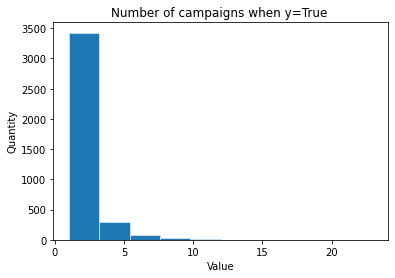

In [100]:
data_hist = data_true
fig, ax = plt.subplots()
ax.hist(data_hist, bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Value", title="Number of campaigns when y=True ")
plt.show()

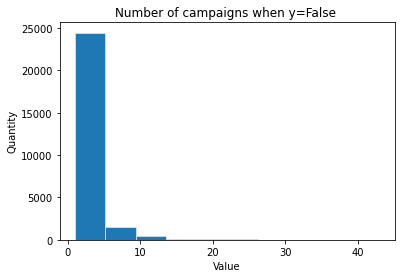

In [101]:
data_hist = data_false
fig, ax = plt.subplots()
ax.hist(data_hist, bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "Value", title="Number of campaigns when y=False ")
plt.show()

We can see with these histograms that our data doesn't come from normal distribution.

Implementation of the F test in order to compare our variances:

In [102]:
F = stats.f(len(data_true.to_numpy()),len(data_false.to_numpy()))
top = data_true.std()
bottom = data_false.std()
print(type(bottom))

f_stat = (top/bottom)**2
rejection_area = f_stat > F.cdf(0.05)
print(rejection_area)

<class 'numpy.float64'>
True


We conclude with this F test and from histograms that variance of variables X and variance of variables Y are different and that our data doesn't come from normal distribution. Therefore , the assumptions on the T test aren't held.

Implementation of T test:

In [103]:
T = stats.t(len(data)-2)
S_p = (data_true.count()-1)*data_true.std()**2+ (data_false.count()-1)*data_false.std()**2
S_p = S_p /( data_false.count()+data_true.count()-2)
S_p **=0.5 
T_stat = (data_true.mean()-data_false.mean())/(S_p*(1/data_true.count()+1/data_false.count())**0.5)

rej_area = abs(T_stat) > abs(T.cdf(1-alpha/2))
print('T test statistic is : ', T_stat)
print('T value is : ', T.cdf(1-alpha/2))
print("Are we rejecting H0 ? ",rej_area)

T test statistic is :  -12.163991742140341
T value is :  0.8352160093801207
Are we rejecting H0 ?  True


In [104]:
p_value = 2* stats.t(len(data)-2).cdf(-1 * abs(T_stat))
print("P-Value of T test is:",p_value)

P-Value of T test is: 5.792964944059213e-34


We conclude with this test that we reject the null hypothesis.

Implementation of Wald test:

In [105]:
sd_noraml = data_true.std()**2/data_true.count()+data_false.std()**2/data_false.count()
sd_noraml **= 0.5
W =( data_true.mean()-data_false.mean())/sd_noraml
rejection_area_Wald = abs(W)>z.cdf(1-alpha/2)
print('Wald test statistic is : ', W)
print("Are we rejecting H0 ? ",rejection_area_Wald)

Wald test statistic is :  -18.120795654383315
Are we rejecting H0 ?  True


We conclude with this test that we reject the null hypothesis.

In [106]:
p_value = 2* z.cdf(-1* abs(W))
print("P-Value of Wald test is:",p_value)

P-Value of Wald test is: 2.184135481042085e-73


**TODO P-VALUE of T test**

In [107]:
S_p = (data_true.count()-1)*data_true.std()**2+ (data_false.count()-1)*data_false.std()**2
S_p = S_p /( data_false.count()+data_true.count()-2)
S_p **=0.5 

True_mean = data_true.mean()
False_mean = data_false.mean()
total_mean = data["campaign"].mean()

N_true = stats.norm(True_mean,S_p**2)
N_false = stats.norm(False_mean,S_p**2)
N_total = stats.norm(total_mean,data["campaign"].std()**2)

sumD = 0
for d in (data_true.to_numpy()):
    sumD+=np.log(N_true.pdf(d))
    sumD-=np.log(N_total.pdf(d))
for d in (data_false.to_numpy()):
    sumD+=np.log(N_false.pdf(d))
    sumD-=np.log(N_total.pdf(d))
    
sumD*=2

chi = stats.chi2(1).pdf(1-alpha/2)
print(sumD)
print(chi)
print("Do we reject the null hyposis? ",sumD > chi)


273.52686645158366
0.24813566918955035
Do we reject the null hyposis?  True


Therefore we can conclude that according to the test we perform, we will reject the null hypothesis.

**Part 3**

Calculation of Confidence Intervals of expectations of our data samples:

In [108]:
data_30  = data.sample(30)
data_50  = data.sample(50)
data_100  = data.sample(100)
data_500  = data.sample(500)

arr = [data_30,data_50,data_100,data_500]
names = ["data_30","data_50","data_100","data_500"]
for d,n in zip(arr,names):
    print(n)
    cam1_mean = d[d["y"]==True]["campaign"].mean()
    cam1_se = d[d["y"]==True]["campaign"].std()
    cam2_mean = d[d["y"]==False]["campaign"].mean()
    cam2_se = d[d["y"]==False]["campaign"].std()
    print("CI for Y=True:")
    print(f"({cam1_mean - z.cdf(1-alpha/2)*cam1_se},{cam1_mean + z.cdf(1-alpha/2)*cam1_se})")
    print("CI for Y=False:")
    print(f"({cam2_mean - z.cdf(1-alpha/2)*cam2_se},{cam2_mean + z.cdf(1-alpha/2)*cam2_se})")
    print("****************************************************************")



data_30
CI for Y=True:
(-0.18052233382596272,5.180522333825962)
CI for Y=False:
(0.9978697902206379,2.8354635431126956)
****************************************************************
data_50
CI for Y=True:
(0.6689543031889882,3.831045696811012)
CI for Y=False:
(0.8837201496431626,4.942366806878576)
****************************************************************
data_100
CI for Y=True:
(1.0499765386300188,2.825023461369981)
CI for Y=False:
(0.7635833496295983,2.950702364656116)
****************************************************************
data_500
CI for Y=True:
(0.09312348993031128,4.553030356223536)
CI for Y=False:
(0.35686263120912054,4.843137368790879)
****************************************************************


In comparaison with the first question, we can note that the values of our confidence intervals tend to the values we found in the first question, when the size of the sample grows.

Implementation of the Wald test for each sample:

In [109]:
for d,n in zip(arr,names):
    print(n)
    cam1_mean = d[d["y"]==True]["campaign"].mean()
    cam1_se = d[d["y"]==True]["campaign"].std()
    cam1_count = d[d["y"]==True]["campaign"].count()
    cam2_mean = d[d["y"]==False]["campaign"].mean()
    cam2_se = d[d["y"]==False]["campaign"].std()
    cam2_count = d[d["y"]==False]["campaign"].count()
    sd_noraml = cam1_se**2/cam1_count+cam2_se**2/cam2_count
    sd_noraml **= 0.5
    W =( cam1_mean-cam2_mean)/sd_noraml
    rejection_area_w_samples = abs(W)>z.cdf(1-alpha/2)
    print('Wald test statistic is : ', W)
    print("Are we rejecting H0 ? ",rejection_area_w_samples)
    print("********************************")


data_30
Wald test statistic is :  0.4388211351503195
Are we rejecting H0 ?  False
********************************
data_50
Wald test statistic is :  -0.6551737165001134
Are we rejecting H0 ?  False
********************************
data_100
Wald test statistic is :  0.2664090310640139
Are we rejecting H0 ?  False
********************************
data_500
Wald test statistic is :  -0.7793740744715635
Are we rejecting H0 ?  False
********************************


In comparaison to the question 2 we note that our values of Wald test statistic aren't very close to what we received.
However, we note that the more the size of our sample increases, the more close our value gets.

In [110]:
True_total = [[],[],[],[]]
False_total = [[],[],[],[]]
W_total = [[],[],[],[]]
p_values_list = [[],[],[],[]]
for i in range(100):
    data_30  = data.sample(30)
    data_50  = data.sample(50)
    data_100  = data.sample(100)
    data_500  = data.sample(500)
    arr = [data_30,data_50,data_100,data_500]
    nums = [0,1,2,3]
    for d,i in zip(arr,nums):
        #print(i)
        cam1_mean = d[d["y"]==True]["campaign"].mean()
        cam1_se = d[d["y"]==True]["campaign"].std()
        cam2_mean = d[d["y"]==False]["campaign"].mean()
        cam2_se = d[d["y"]==False]["campaign"].std()
        True_area = ({cam1_mean - z.cdf(1-alpha/2)*cam1_se},{cam1_mean + z.cdf(1-alpha/2)*cam1_se})
        False_area = ({cam2_mean - z.cdf(1-alpha/2)*cam2_se},{cam2_mean + z.cdf(1-alpha/2)*cam2_se})
        True_size = 2*z.cdf(1-alpha/2)*cam1_se
        False_size = 2*z.cdf(1-alpha/2)*cam2_se
        sd_noraml = cam1_se**2/cam1_count+cam2_se**2/cam2_count
        sd_noraml **= 0.5
        W =( cam1_mean-cam2_mean)/sd_noraml
        Pv = 2* z.cdf(-1* abs(W))
        True_total[i].append(True_size)
        False_total[i].append(False_size)
        W_total[i].append(W)
        p_values_list[i].append(Pv)
        


In [111]:
temp_data = []
tot_mean = data["campaign"].mean()
data_dict = {}


In [112]:
import math
def remove_nun(arr):
    for a in arr:
        a =  [item for item in a if not(math.isnan(item)) == True]
    


In [113]:
for i in [30,50,100,500]:
        True_total = []
        False_total = []
        W_total = []
        p_values_list = []
        is_in_true = []
        is_in_false = []
        nums = [0,1,2,3]
        for j in range(100):
                data_30  = data.sample(i)
                cam1_mean = data_30[data_30["y"]==True]["campaign"].mean()
                cam1_se = data_30[data_30["y"]==True]["campaign"].std()
                cam2_mean = data_30[data_30["y"]==False]["campaign"].mean()
                cam2_se = data_30[data_30["y"]==False]["campaign"].std()
                #True_area = ({cam1_mean - z.cdf(1-alpha/2)*cam1_se},{cam1_mean + z.cdf(1-alpha/2)*cam1_se})
                #False_area = ({cam2_mean - z.cdf(1-alpha/2)*cam2_se},{cam2_mean + z.cdf(1-alpha/2)*cam2_se})
                True_size = 2*z.cdf(1-alpha/2)*cam1_se
                False_size = 2*z.cdf(1-alpha/2)*cam2_se
                sd_noraml = cam1_se**2/cam1_count+cam2_se**2/cam2_count
                sd_noraml **= 0.5
                W =( cam1_mean-cam2_mean)/sd_noraml
                Pv = 2* z.cdf(-1* abs(W))
                True_total.append(True_size)
                False_total.append(False_size)
                W_total.append(W)
                p_values_list.append(Pv)
                is_in_true.append(True if tot_mean <= cam1_mean + z.cdf(1-alpha/2)*cam1_se and cam1_mean - z.cdf(1-alpha/2)*cam1_se <=tot_mean else False)
                is_in_false.append(True if tot_mean <= cam2_mean + z.cdf(1-alpha/2)*cam2_se and cam2_mean - z.cdf(1-alpha/2)*cam2_se <=tot_mean else False)
                iterArr = [True_total,False_total,W_total,p_values_list,is_in_true,is_in_false]
                remove_nun(iterArr)
                
        data_dict[i] = iterArr


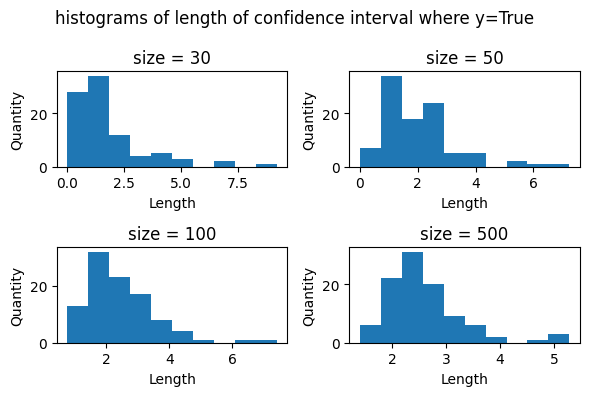

In [114]:
#plotting hist of True total length
fig,ax = plt.subplots(2,2)
dd = [data_dict[d][0] for d in data_dict]
plt.suptitle("histograms of length of confidence interval where y=True")
fig.set_dpi(100)
ax[0,0].hist(dd[0])
ax[0,0].set_title("size = 30")
ax[0,1].hist(dd[1])
ax[0,1].set_title("size = 50")
ax[1,0].hist(dd[2])
ax[1,0].set_title("size = 100")
ax[1,1].hist(dd[3])
ax[1,1].set_title("size = 500")

for a in ax.flat:
    a.set(xlabel='Length', ylabel='Quantity')

fig.tight_layout()



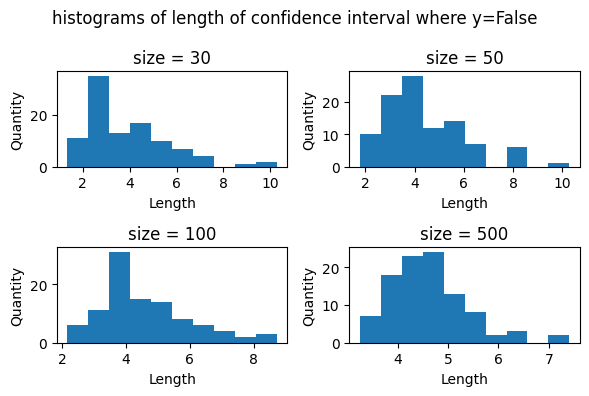

In [115]:
#plotting hist of True total length
fig,ax = plt.subplots(2,2)
dd = [data_dict[d][1] for d in data_dict]
plt.suptitle("histograms of length of confidence interval where y=False")
fig.set_dpi(100)
ax[0,0].hist(dd[0])
ax[0,0].set_title("size = 30")
ax[0,1].hist(dd[1])
ax[0,1].set_title("size = 50")
ax[1,0].hist(dd[2])
ax[1,0].set_title("size = 100")
ax[1,1].hist(dd[3])
ax[1,1].set_title("size = 500")

for a in ax.flat:
    a.set(xlabel='Length', ylabel='Quantity')

fig.tight_layout()

With these graphs we can note that the lenght of our confidence intervals tend to the normal distribution function comportment (The more the size of our samples increases, the more it looks like).

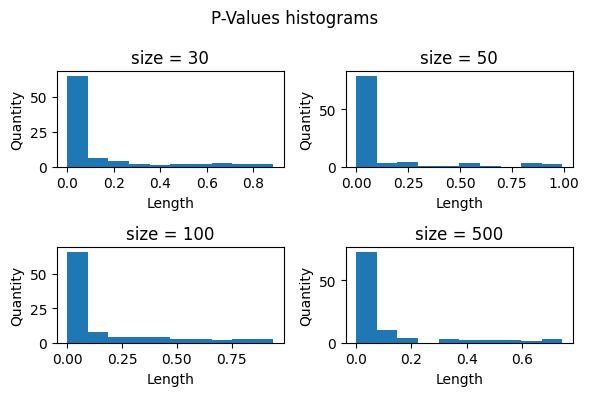

In [116]:
#plotting hist of True total length
fig,ax = plt.subplots(2,2)
dd = [data_dict[d][3] for d in data_dict]
plt.suptitle("P-Values histograms")
fig.set_dpi(100)
ax[0,0].hist(dd[0])
ax[0,0].set_title("size = 30")
ax[0,1].hist(dd[1])
ax[0,1].set_title("size = 50")
ax[1,0].hist(dd[2])
ax[1,0].set_title("size = 100")
ax[1,1].hist(dd[3])
ax[1,1].set_title("size = 500")

for a in ax.flat:
    a.set(xlabel='Length', ylabel='Quantity')

fig.tight_layout()

With these graphs we can note that the p-values values tend to a particular distribution function comportment (The more the size of our samples increases, the more it looks like).

Legend of our histograms that follow:

Data Sample of size 30: blue\
Data Sample of size 50: orange\
Data Sample of size 100: green\
Data Sample of size 500: red

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


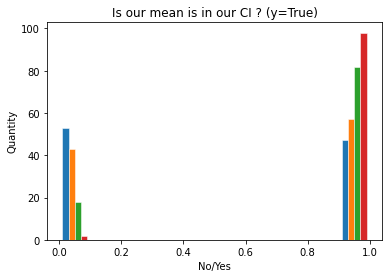

In [117]:
dd = [data_dict[d][4] for d in data_dict]
fig, ax = plt.subplots()
ax.hist(dd, bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "No/Yes", title="Is our mean is in our CI ? (y=True)")
plt.show()

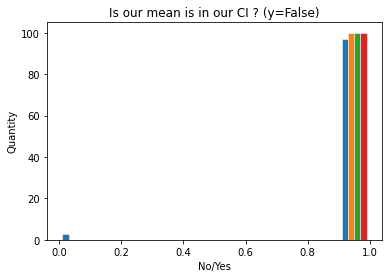

In [118]:
dd = [data_dict[d][5] for d in data_dict]
fig, ax = plt.subplots()
ax.hist(dd, bins=10, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Quantity", xlabel= "No/Yes", title="Is our mean is in our CI ? (y=False)")
plt.show()

With these histograms we can learn that the more the size of our samples increases, the more the percentage of times that our mean found in the first question is located in our CI increases.